In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# load local version of skaro, before pip installed version, for debugging
import pathlib
import sys
import os

sys.path.append(str(pathlib.Path(os.getcwd()).parent.joinpath("src")))

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import yt

from skaro.model import Model
from skaro.particles import rotated_dataset
from skaro.visualization.yt_maps import plot_component_maps

## DATA SETUP

In [5]:
snapshot = 127
resolution = 8192
sim_id = "37_11"

In [6]:
model = Model(
    snapshot=snapshot,
    resolution=resolution,
    sim_id=sim_id,
)
ds = model.ds
mw = model.halo


      DETECTED LOCAL MACHINE: Test snapshot loaded.


      CONFIG: Setting resolution to 4096.


      CONFIG: Setting sim_id to 09_18.



yt : [INFO     ] 2024-03-12 15:03:07,028 Calculating time from 1.000e+00 to be 4.318e+17 seconds
yt : [INFO     ] 2024-03-12 15:03:07,095 Parameters: current_time              = 4.318436660023809e+17 s
yt : [INFO     ] 2024-03-12 15:03:07,095 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-03-12 15:03:07,096 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-03-12 15:03:07,096 Parameters: domain_right_edge         = [100. 100. 100.]
yt : [INFO     ] 2024-03-12 15:03:07,097 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2024-03-12 15:03:07,097 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2024-03-12 15:03:07,098 Parameters: omega_lambda              = 0.682
yt : [INFO     ] 2024-03-12 15:03:07,098 Parameters: omega_matter              = 0.318
yt : [INFO     ] 2024-03-12 15:03:07,099 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2024-03-12 15:03:07,099 Parameters: hubble_constant   

## PLOT SETUP

In [7]:
figure_subdirectory = f"MilkyWayAnalogue/{model.resolution}/{model.sim_id}/{model.snapshot}/Galaxy_component_maps"
save = True

## CREATE DATA SOURCE

In [8]:
radius = 0.2 * mw.virial_radius()
normal_vector = mw.normal_vector("stars", data=mw.sphere(radius=(10, "kpc")))

In [9]:
sphere_data = mw.sphere(radius=radius)
rotated_data = {
    component: rotated_dataset(
        sphere_data,
        mw.centre(),
        normal_vector,
        [
            (f"{component}_stars", "total_number"),
        ],
        bounding_box=[
            [-ds.domain_width[0].to("kpc") / 2, ds.domain_width[0].to("kpc") / 2]
        ]
        * 3,
    )
    for component in ["bulge", "thin_disk", "thick_disk", "halo", "galaxy"]
}

yt : [INFO     ] 2024-03-12 15:03:14,967 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-12 15:03:14,968 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-03-12 15:03:14,969 Parameters: domain_left_edge          = [-73778.96826036 -73778.96826036 -73778.96826036]
yt : [INFO     ] 2024-03-12 15:03:14,969 Parameters: domain_right_edge         = [73778.96826036 73778.96826036 73778.96826036]
yt : [INFO     ] 2024-03-12 15:03:14,970 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-03-12 15:03:14,972 Allocating for 1.069e+05 particles
yt : [INFO     ] 2024-03-12 15:03:16,952 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-12 15:03:16,953 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-03-12 15:03:16,953 Parameters: domain_left_edge          = [-73778.96826036 -73778.96826036 -73778.96826036]
yt : [INFO     ] 2024-03-12 15:03:16,954 Parameters: domain_right_edge         = [73778.96826036 73778.

## PLOT MAPS

yt : [INFO     ] 2024-03-12 15:03:23,263 xlim = -21.650000 21.650000


yt : [INFO     ] 2024-03-12 15:03:23,264 ylim = -21.650000 21.650000
yt : [INFO     ] 2024-03-12 15:03:23,267 xlim = -21.650000 21.650000
yt : [INFO     ] 2024-03-12 15:03:23,268 ylim = -21.650000 21.650000
yt : [INFO     ] 2024-03-12 15:03:23,272 Splatting (('bulge_stars', 'total_number')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2024-03-12 15:03:25,222 xlim = -21.650000 21.650000
yt : [INFO     ] 2024-03-12 15:03:25,223 ylim = -21.650000 21.650000
yt : [INFO     ] 2024-03-12 15:03:25,224 xlim = -21.650000 21.650000
yt : [INFO     ] 2024-03-12 15:03:25,225 ylim = -21.650000 21.650000
yt : [INFO     ] 2024-03-12 15:03:25,226 Splatting (('thin_disk_stars', 'total_number')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2024-03-12 15:03:26,750 xlim = -21.650000 21.650000
yt : [INFO     ] 2024-03-12 15:03:26,751 ylim = -21.650000 21.650000
yt : [INFO     ] 2024-03-12 15:03:26,753 xlim = -21.650000 21.650000
yt : [INFO     ] 2024-03-12 15:03:26,753 ylim = -21.

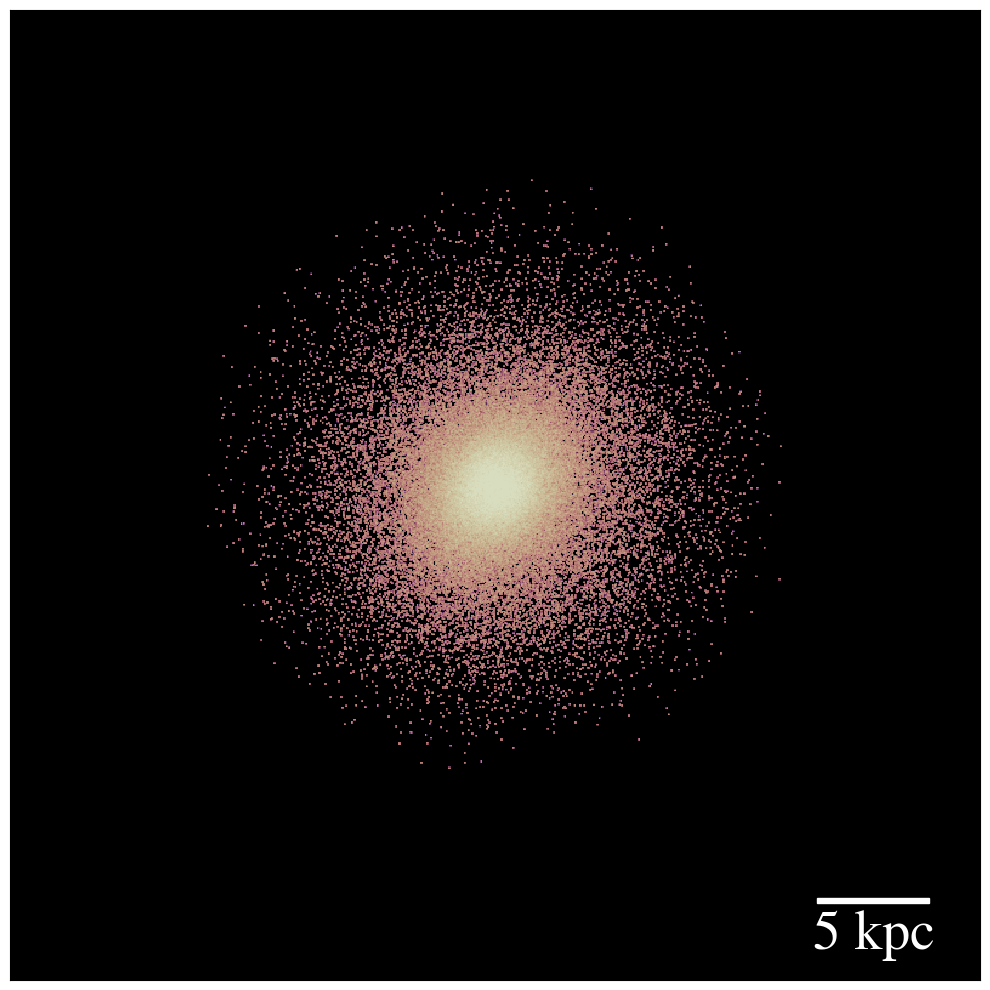

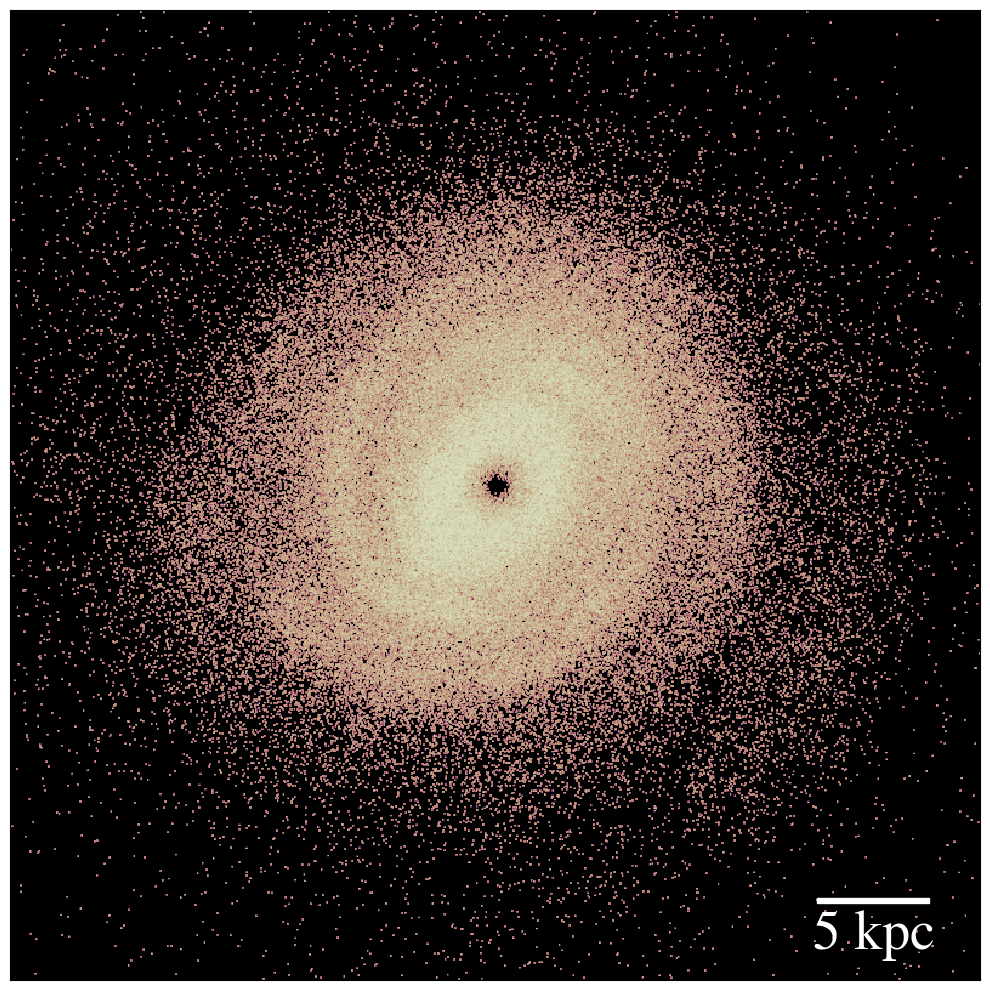

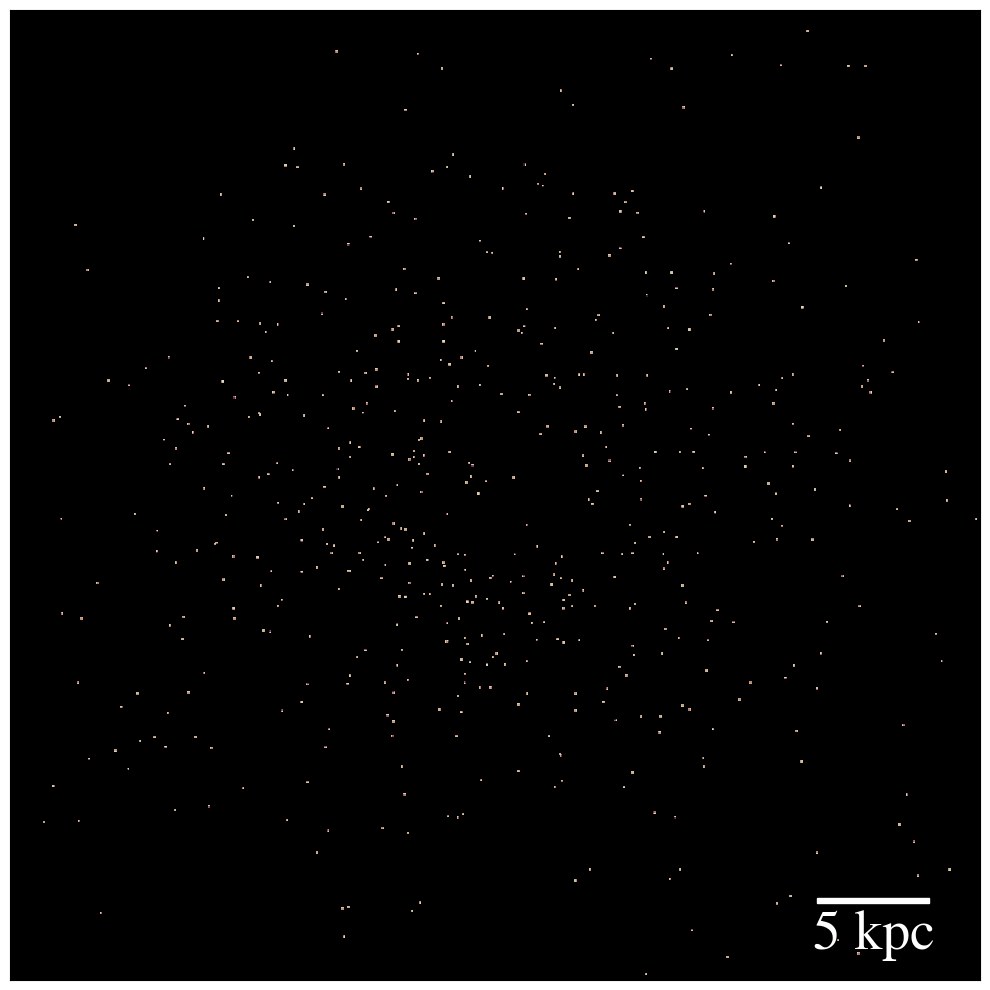

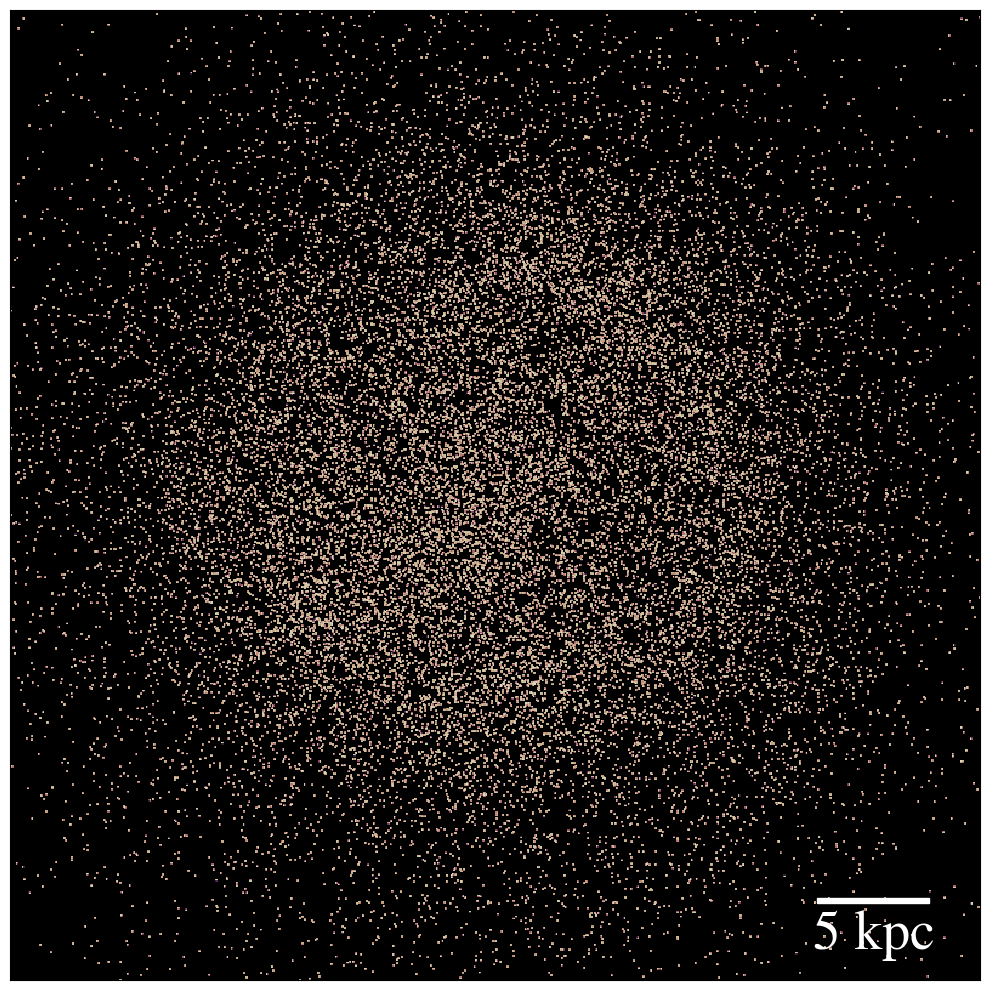

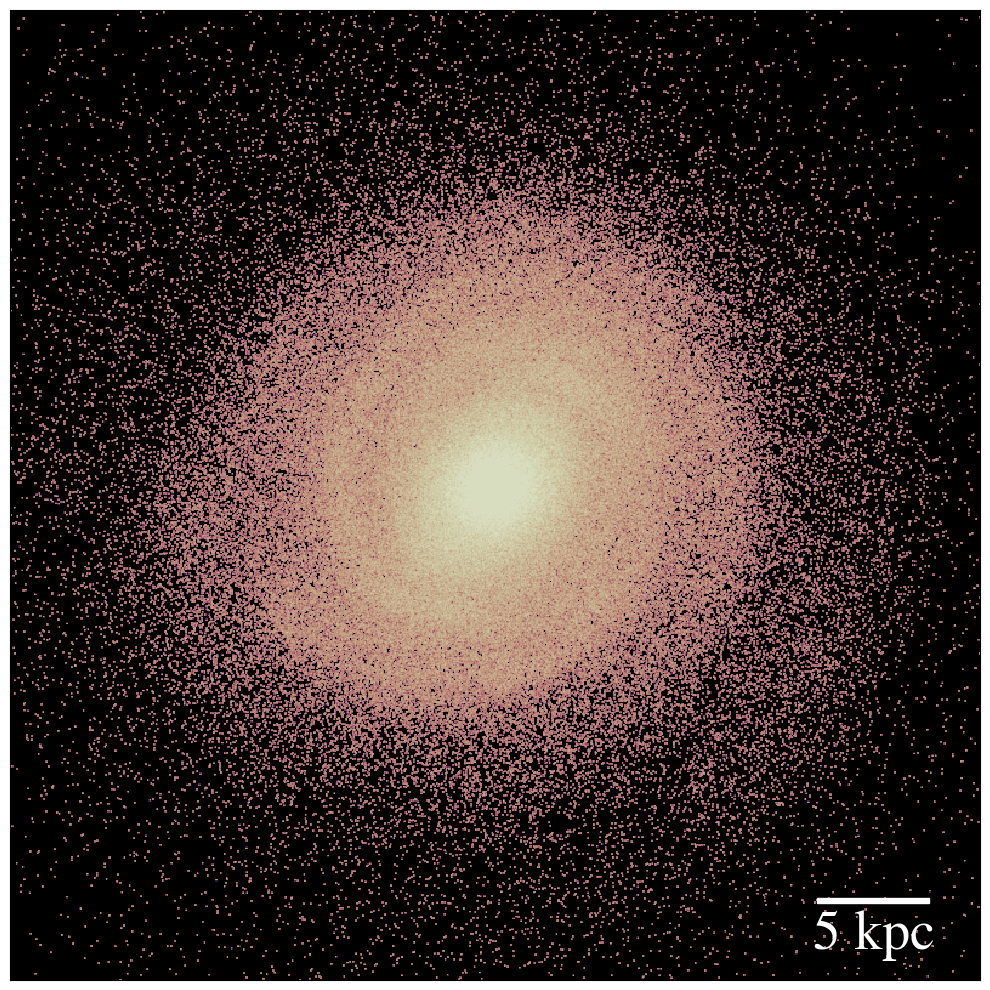

In [10]:
plots, figs = plot_component_maps(
    galaxy_component_data=rotated_data,
    depth=(10, "kpc"),
    normal="z",
    save=save,
    figure_subdirectory=figure_subdirectory,
)

yt : [INFO     ] 2024-03-12 15:03:32,637 xlim = -21.650000 21.650000
yt : [INFO     ] 2024-03-12 15:03:32,639 ylim = -5.000000 5.000000
yt : [INFO     ] 2024-03-12 15:03:32,642 xlim = -21.650000 21.650000
yt : [INFO     ] 2024-03-12 15:03:32,643 ylim = -5.000000 5.000000
yt : [INFO     ] 2024-03-12 15:03:32,645 Splatting (('bulge_stars', 'total_number')) onto a 800 by 800 mesh using method 'cic'


yt : [INFO     ] 2024-03-12 15:03:33,779 xlim = -21.650000 21.650000
yt : [INFO     ] 2024-03-12 15:03:33,780 ylim = -5.000000 5.000000
yt : [INFO     ] 2024-03-12 15:03:33,783 xlim = -21.650000 21.650000
yt : [INFO     ] 2024-03-12 15:03:33,795 ylim = -5.000000 5.000000
yt : [INFO     ] 2024-03-12 15:03:33,797 Splatting (('thin_disk_stars', 'total_number')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2024-03-12 15:03:35,016 xlim = -21.650000 21.650000
yt : [INFO     ] 2024-03-12 15:03:35,017 ylim = -5.000000 5.000000
yt : [INFO     ] 2024-03-12 15:03:35,019 xlim = -21.650000 21.650000
yt : [INFO     ] 2024-03-12 15:03:35,020 ylim = -5.000000 5.000000
yt : [INFO     ] 2024-03-12 15:03:35,021 Splatting (('thick_disk_stars', 'total_number')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2024-03-12 15:03:35,953 xlim = -21.650000 21.650000
yt : [INFO     ] 2024-03-12 15:03:35,954 ylim = -5.000000 5.000000
yt : [INFO     ] 2024-03-12 15:03:35,956 xlim = -21.65000

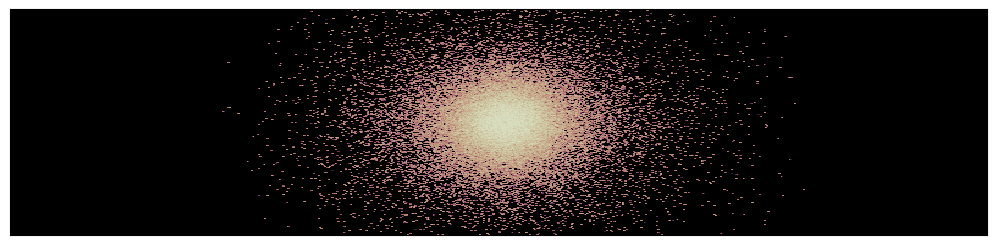

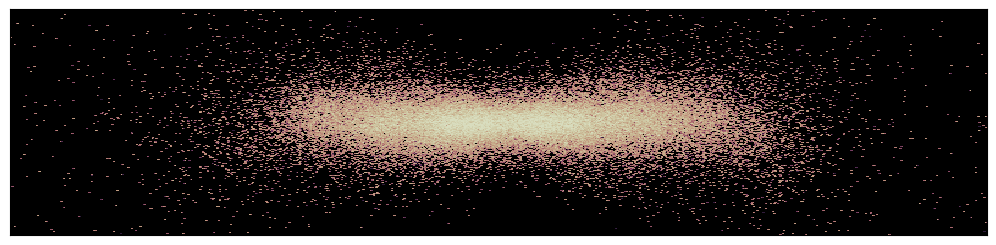

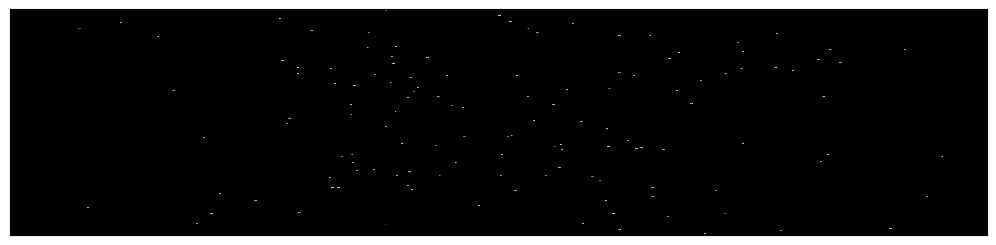

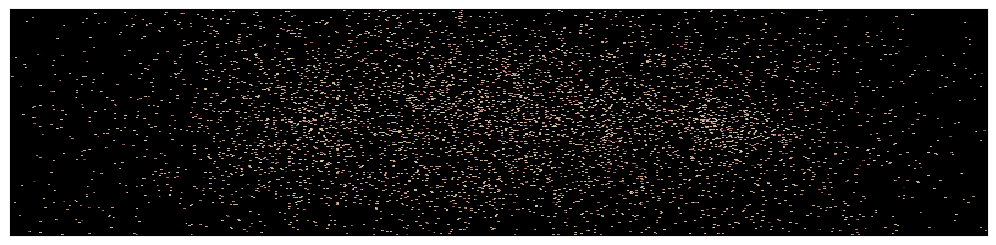

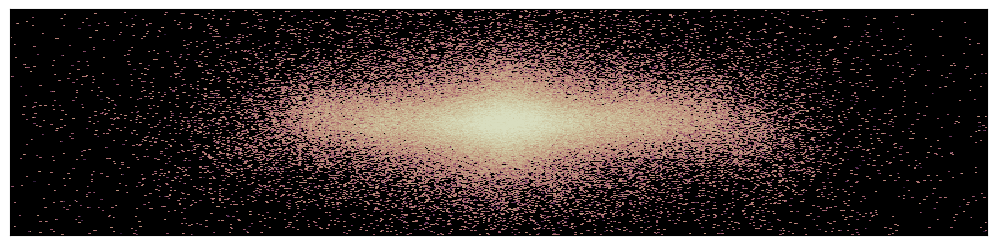

In [11]:
plots, figs = plot_component_maps(
    galaxy_component_data=rotated_data,
    normal="x",
    width=((43.3, "kpc"), (10, "kpc")),
    depth=(10, "kpc"),
    save=save,
    annotate_scale=False,
    figure_subdirectory=figure_subdirectory,
)

## FIT SCALE HEIGHTS

thin_disk  scale height: 0.97 kpc
thick_disk scale height: 5.18 kpc
bulge      scale height: 1.06 kpc
halo       scale height: 6.29 kpc


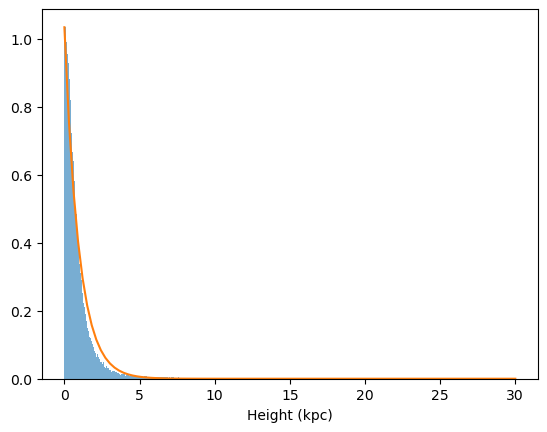

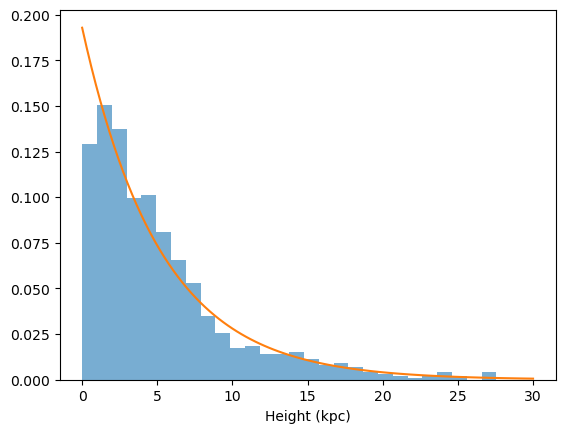

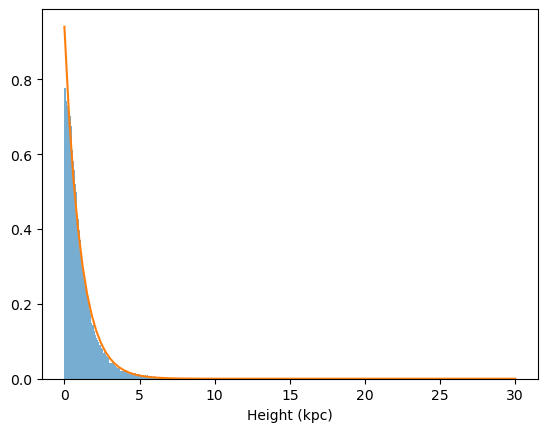

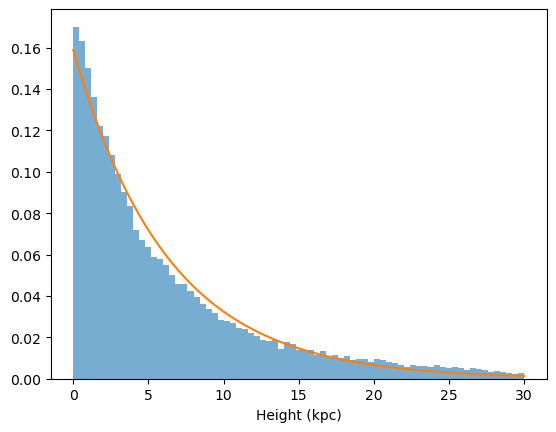

In [67]:
for component in ["thin_disk", "thick_disk", "bulge", "halo"]:
    heights = np.abs(
        rotated_data[component].r[component + "_stars", "particle_position_z"].value
    )
    heights = heights[heights < 30]
    print("{:<10} scale height: {:.2f} kpc".format(component, np.mean(heights)))

    # Plot the histogram and a exponential distribution with the mean as value
    plt.figure()
    plt.hist(heights, bins="fd", density=True, alpha=0.6)
    x = np.linspace(0, 30, 100)
    plt.plot(x, np.exp(-x / np.mean(heights)) / np.mean(heights), label="Exponential")
    plt.xlabel("Height (kpc)")